# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV,RidgeCV,Ridge,Lasso,ElasticNet

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/iris.csv')

In [4]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

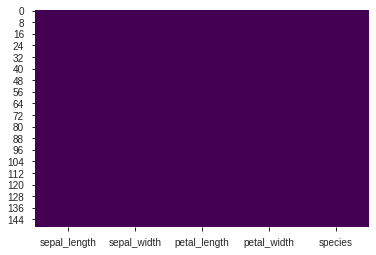

In [8]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


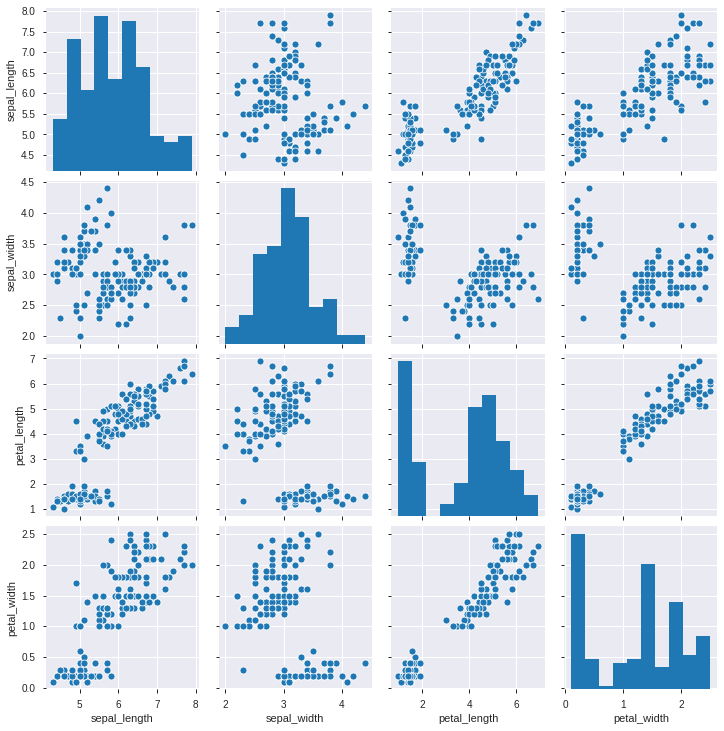

In [11]:
sns.pairplot(data)

In [12]:
pandas_profiling.ProfileReport(data)

In [13]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
x_data=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [15]:
y_data=data['species']

In [16]:
model=LogisticRegression()

In [17]:
x_traine,x_test,y_traine,y_test=train_test_split(x_data,y_data,test_size=0.20)

In [18]:
x_traine.shape

(120, 4)

In [19]:
y_traine.shape

(120,)

In [20]:
x_test.shape

(30, 4)

In [21]:
y_test.shape

(30,)

In [22]:
model.fit(x_traine,y_traine)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
model.coef_

array([[-0.3832742 ,  0.93159225, -2.3193404 , -1.01082753],
       [ 0.52125778, -0.44381769, -0.14355906, -0.86855815],
       [-0.13798358, -0.48777456,  2.46289946,  1.87938568]])

In [24]:
model.intercept_

array([  8.75168192,   2.09783866, -10.84952058])

In [25]:
new_prediction=model.predict(x_test)
new_prediction

array(['setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa'], dtype=object)

In [26]:
trine_score=model.score(x_traine,y_traine)
trine_score

0.975

In [27]:
test_score=model.score(x_test,y_test)
test_score

1.0

In [28]:
y_predict_prob = model.predict_proba(x_test)[:, 1]

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [30]:
print('Accuracy: ', accuracy_score(y_test,new_prediction))
#print('log loss: ', log_loss(y_test, y_predict_prob))

Accuracy:  1.0


In [31]:
x_trine,x_test,y_trine,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=10)
solver=['liblinear','newton-cg','lbfgs','sag','saga']

In [32]:
for i in solver:
    model=LogisticRegression(solver=i,max_iter=10000)
    model.fit(x_trine,y_trine)
    predicted=model.predict(x_test)
    print('slover is this',i)
    print('traine score ',model.score(x_trine,y_trine))
    print('test score ',model.score(x_test,y_test))
    df=pd.DataFrame({'New_predict':predicted,'actual_data':y_test})
    
    print(df)

slover is this liblinear
traine score  0.9464285714285714
test score  0.9473684210526315
    New_predict actual_data
87   versicolor  versicolor
111   virginica   virginica
10       setosa      setosa
91   versicolor  versicolor
49       setosa      setosa
60   versicolor  versicolor
72   versicolor  versicolor
67   versicolor  versicolor
39       setosa      setosa
55   versicolor  versicolor
66    virginica  versicolor
142   virginica   virginica
53   versicolor  versicolor
1        setosa      setosa
19       setosa      setosa
112   virginica   virginica
85    virginica  versicolor
38       setosa      setosa
21       setosa      setosa
35       setosa      setosa
102   virginica   virginica
132   virginica   virginica
126   virginica   virginica
24       setosa      setosa
61   versicolor  versicolor
2        setosa      setosa
95   versicolor  versicolor
90   versicolor  versicolor
76   versicolor  versicolor
117   virginica   virginica
58   versicolor  versicolor
97   versicolor

In [33]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,recall_score,classification_report,r2_score

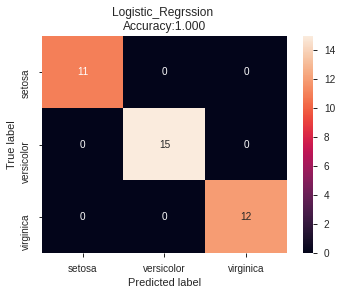

In [35]:
import matplotlib.pyplot as plt
clf = LogisticRegression(solver='lbfgs').fit(x_traine,y_traine)
clf.predict(x_traine)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic_Regrssion \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# k-Nearest Neighbors

In [37]:

data1=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/iris.csv')

In [38]:
x_data1=data1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [39]:
y_data1=data1['species']

In [40]:
x_trine,x_test,y_trine,y_test=train_test_split(x_data1,y_data1,test_size=0.2,random_state=4)
print('Trine set:',x_trine.shape,y_trine.shape)
print('Test set:',x_test.shape,y_test.shape)

Trine set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [41]:
#Classification KNN
from sklearn.neighbors import KNeighborsClassifier

In [42]:
#Trining
k=4
#trine model and predict
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_trine,y_trine)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [43]:
neigh.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [44]:
trine_score=neigh.score(x_trine,y_trine)
trine_score

0.975

In [45]:
test_score=neigh.score(x_test,y_test)
test_score

0.9666666666666667

In [46]:
neigh.weights

'uniform'

In [47]:
yhat=neigh.predict(x_test)
yhat[0:8]

array(['virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa'], dtype=object)

In [48]:
pd.DataFrame({'Acutual Data':y_test,'New_prediction':yhat})

,Acutual Data,New_prediction
128,virginica,virginica
18,setosa,setosa
130,virginica,virginica
105,virginica,virginica
107,virginica,virginica
78,versicolor,versicolor
83,versicolor,virginica
14,setosa,setosa
5,setosa,setosa
133,virginica,virginica


In [49]:
#Accuracy Evaluation
from sklearn import metrics
print("Trine Set Accuracy:",metrics.accuracy_score(y_trine,neigh.predict(x_trine)))
print("Test Set Accuracy:",metrics.accuracy_score(y_test,yhat))

Trine Set Accuracy: 0.975
Test Set Accuracy: 0.9666666666666667


In [50]:
# what about other k
ks=20
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
ConfustionMx=[];
for n in range(1,ks):
    # trine model and predict
    neigh=KNeighborsClassifier(n_neighbors=n).fit(x_trine,y_trine)
    yhat=neigh.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.93333333, 0.93333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667])

In [51]:
std_acc

array([0.045542  , 0.045542  , 0.03277307, 0.03277307, 0.03277307,
       0.03277307, 0.03277307, 0.03277307, 0.03277307, 0.03277307,
       0.03277307, 0.03277307, 0.03277307, 0.03277307, 0.03277307,
       0.03277307, 0.03277307, 0.03277307, 0.03277307])

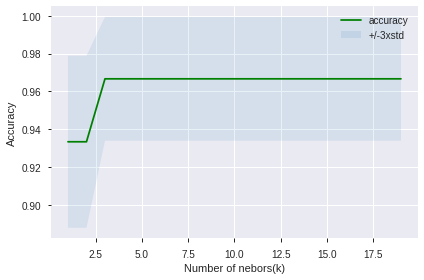

In [52]:
#plot model accuracy for different number of neighbors
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('accuracy','+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of nebors(k)')
plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,recall_score,classification_report,r2_score

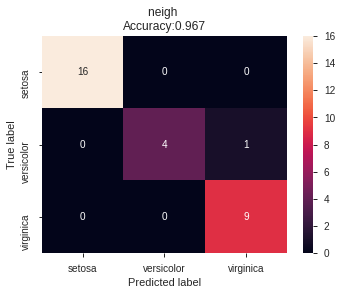

In [54]:
import matplotlib.pyplot as plt
clf = neigh.fit(x_traine,y_traine)
clf.predict(x_traine)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('neigh \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [55]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



# Naive Bayes Classifier

In [56]:

data2=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/iris.csv')


In [57]:
x_data2=data2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [58]:
y_data2=data2['species']

In [59]:
x_trine,x_test,y_trine,y_test=train_test_split(x_data2,y_data2,test_size=0.2,random_state=4)
print('Trine set:',x_trine.shape,y_trine.shape)
print('Test set:',x_test.shape,y_test.shape)

Trine set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [60]:
#import Gassian Naive Bayes model
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [61]:
gnb=GaussianNB()
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
gnb.fit(x_trine,y_trine)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
gnb.class_count_

array([34., 45., 41.])

In [64]:
gnb.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
gnb.class_prior_

array([0.28333333, 0.375     , 0.34166667])

In [66]:
new_predict=gnb.predict(x_test)
new_predict

array(['virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica'], dtype='<U10')

In [67]:
gnb.score(x_trine,y_trine)

0.9583333333333334

In [68]:
gnb.score(x_test,y_test)

0.9666666666666667

In [69]:
pd.DataFrame({"Actual_Data":y_test,"New_Predict":new_predict})

,Actual_Data,New_Predict
128,virginica,virginica
18,setosa,setosa
130,virginica,virginica
105,virginica,virginica
107,virginica,virginica
78,versicolor,versicolor
83,versicolor,versicolor
14,setosa,setosa
5,setosa,setosa
133,virginica,versicolor


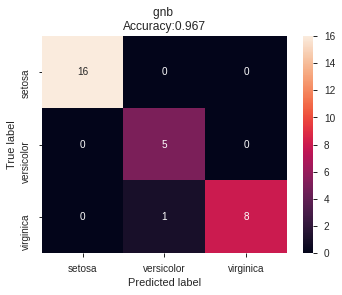

In [70]:
import matplotlib.pyplot as plt
clf = gnb.fit(x_traine,y_traine)
clf.predict(x_traine)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('gnb \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [71]:
print(classification_report(y_test,new_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.83      1.00      0.91         5
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.94      0.96      0.95        30
weighted avg       0.97      0.97      0.97        30



In [72]:
#multinomial Naive Bayes model
mnb=MultinomialNB()

In [73]:
x_traine,x_test,y_train,y_test=train_test_split(x_data2,y_data2,test_size=0.25)

In [74]:
mnb.fit(x_traine,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [75]:
mnb.class_count_

array([39., 36., 37.])

In [76]:
mnb.class_log_prior_

array([-1.05493723, -1.13497993, -1.10758096])

In [77]:
mnb.score(x_traine,y_train)

0.9553571428571429

In [78]:
mnb.score(x_test,y_test)

0.9736842105263158

In [79]:
new_mnb=mnb.predict(x_test)
new_mnb

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa'], dtype='<U10')

In [80]:
print(classification_report(y_test,new_mnb))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [81]:
#BernoulliNB
bee=BernoulliNB()

In [82]:
x_traine,x_test,y_train,y_test=train_test_split(x_data2,y_data2,test_size=0.25)

In [83]:
bee.fit(x_traine,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [84]:
bee.score(x_traine,y_train)

0.3482142857142857

In [85]:
bee.score(x_test,y_test)

0.2894736842105263

In [86]:
pred_bnb=bee.predict(x_test)
pred_bnb

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor'], dtype='<U10')

# Support Vector Machine(SVM)

In [87]:

data3=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/iris.csv')

In [88]:
x_data3=data3[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [89]:
y_data3=data3['species']

In [90]:
from sklearn import svm
clf=svm.SVC(gamma='auto',probability=True,kernel='rbf')
clf.fit(x_data3,y_data3)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [91]:
clf.decision_function(x_data3)

array([[ 2.23460078,  0.8231962 , -0.18496101],
       [ 2.23251527,  0.82802979, -0.18456044],
       [ 2.23411449,  0.81852616, -0.17933783],
       [ 2.23063461,  0.82832475, -0.18069244],
       [ 2.23459153,  0.82090277, -0.18281836],
       [ 2.22723934,  0.8494409 , -0.18953893],
       [ 2.23204437,  0.82183217, -0.17776424],
       [ 2.233464  ,  0.82786155, -0.18647778],
       [ 2.22872722,  0.82628139, -0.17446662],
       [ 2.23197591,  0.82968888, -0.1847878 ],
       [ 2.23171733,  0.83242116, -0.18644625],
       [ 2.23123331,  0.83119955, -0.18444637],
       [ 2.23260286,  0.82479393, -0.18189761],
       [ 2.22892622, -0.18334332,  0.83584905],
       [ 2.22528712,  0.83143556, -0.17168301],
       [ 2.22220759,  0.84167013, -0.17421528],
       [ 2.23170056,  0.8262073 , -0.1811576 ],
       [ 2.23431616,  0.82513283, -0.1860311 ],
       [ 2.22359969,  0.86037066, -0.18945796],
       [ 2.2327766 ,  0.82706162, -0.18430259],
       [ 2.22639197,  0.85627889, -0.192

In [92]:
clf.support_vectors_

array([[4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [6.9, 3.1, 4.9, 1.5],
       [6.5, 2.8, 4.6, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 2. , 3.5, 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [6.2, 2.2, 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [6.3, 3.3, 6. , 2.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.5, 3.2, 5.1, 2. ],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3

In [93]:
x_trine,x_test,y_trine,y_test=train_test_split(x_data3,y_data3,test_size=0.15,random_state=445)

In [94]:
trine_score=clf.score(x_trine,y_trine)
trine_score

0.984251968503937

In [95]:
test_score=clf.score(x_test,y_test)
test_score

1.0

In [96]:
y_predict=clf.predict(x_test)
y_predict

array(['setosa', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa'], dtype=object)

In [97]:
pd.DataFrame({'actual':y_test,'new_predict':y_predict})

,actual,new_predict
48,setosa,setosa
14,setosa,setosa
109,virginica,virginica
81,versicolor,versicolor
64,versicolor,versicolor
113,virginica,virginica
123,virginica,virginica
145,virginica,virginica
93,versicolor,versicolor
62,versicolor,versicolor


In [98]:
for kernel in ('linear','poly'):
    clf=svm.SVC(kernel=kernel,gamma=10)
    clf.fit(x_trine,y_trine)
    
    print('traine score ',clf.score(x_trine,y_trine),clf)
    print('test score ',clf.score(x_test,y_test),clf)
    df=pd.DataFrame({'actual':y_test,'new_predict':y_predict})
    
print(df)

traine score  0.9921259842519685 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
test score  1.0 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
traine score  1.0 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
test score  0.9130434782608695 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
    max_iter=-1

In [99]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



# Decision_Tree

In [100]:
#Support Vector Machine(SVM)
data4=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/iris.csv')

In [101]:
x_data4=data4[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [102]:
y_data4=data4['species']

In [103]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_data4,y_data4)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
clf.classes_ 

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [105]:
x_trine,x_test,y_trine,y_test=train_test_split(x_data3,y_data3,test_size=0.15,random_state=445)

In [106]:
trine_score=clf.score(x_trine,y_trine)
trine_score

1.0

In [107]:
test_score=clf.score(x_test,y_test)
test_score

1.0

In [108]:
y_pre=clf.predict(x_test)
y_pre

array(['setosa', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa'], dtype=object)

In [109]:
pd.DataFrame({'actual':y_test,'new_predict':y_pre})

,actual,new_predict
48,setosa,setosa
14,setosa,setosa
109,virginica,virginica
81,versicolor,versicolor
64,versicolor,versicolor
113,virginica,virginica
123,virginica,virginica
145,virginica,virginica
93,versicolor,versicolor
62,versicolor,versicolor


In [110]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

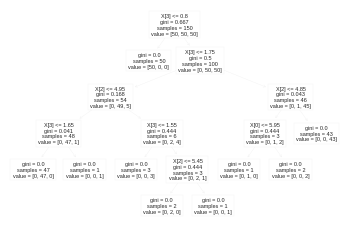

In [111]:
tree.plot_tree(clf)